In [1]:
import pandas as pd

In [2]:
AGE_LABELS = [ '(-0.1, 0]',
               '(0, 12.9]',
               '(12.9, 40.0]',
               '(40.0, 50.0]',
               '(50.0, 60.0]',
               '(60.0, 70.0]',
               '(70.0, 80.0]',
               '(80.0, 120.0]']
'''
17.9]',
               '(17.9, 30.0]',
               '(30.0,
17.9, 30,
'''
def AGE_BINS(df):
      return pd.cut(df['age'], [-0.1, 0, 12.9,  40, 50, 60, 70, 80, 120], labels=AGE_LABELS)

def _agedist(df, df_name):
    total_count = df.shape[0]
    nan_count = df[df['age'].isnull()].shape[0]
    nan_pc = nan_count/total_count

    ages = df['age'].unique()
    ages.sort()
    # Since age has 0.0 values, these should be ignored/replaced
    min_age = ages[1]
    print(f"Invalid age: {df[df['age']==0.0]['age'].count()} Min: {df['age'].min():0.2f} Max: {df['age'].max():0.2f}")

    # Group the ages based on the age-groups
    #bins = pd.cut(df['age'], AGE_BINS)
    df_age = df.groupby(AGE_BINS(df))['age'].agg(['count'])
    df_age = df_age.reset_index()

    

    # Append the null value counts
    df_age = df_age.append(pd.DataFrame([['null', nan_count]], columns = ['age', f'count']))

    # Add a percentage column
    df_age[f'{df_name}_%'] = 100 * df_age['count']/total_count
    df_age = df_age.rename(columns = {'count':f"{df_name}_count"})

    df_age.plot.bar(x='age', y='total_count')

    #print(df_age)
    print(f"Verification:   {df_name}_count: {df_age[f'{df_name}_count'].sum()} "
          f"{df_name}_%: {df_age[f'{df_name}_%'].sum():0.1f}%")
    return df_age, nan_count, nan_pc

In [3]:
# underweight, normal, overweight, obese
BMI_LABELS = [ '[0.0 - 18.5] underweight',
               '[18.5 - 24.9] normal weight',
               '[25 -  30] over weight',
               '[70  <] obese']

def BMI_BINS(df):
      return pd.cut(df['bmi'], [0, 18.5, 24.9, 30, 70], labels=BMI_LABELS)

def _bmidist(df, df_name):
    total_count = df.shape[0]
    nan_count = df[df['bmi'].isnull()].shape[0]
    nan_pc = nan_count/total_count
    print(f"Min: {df['bmi'].min():0.2f} Max: {df['bmi'].max():0.2f}")

    # Group the values based on the bmi-categories
    #bins = pd.cut(df['bmi'], BMI_BINS, labels=BMI_LABELS)
    df_bmi = df.groupby(BMI_BINS(df))['bmi'].agg(['count'])
    df_bmi = df_bmi.reset_index()

    # Append the null value counts
    df_bmi = df_bmi.append(pd.DataFrame([['null', nan_count]], columns = ['bmi', f'count']))

    # Add a percentage column
    df_bmi[f"{df_name}_%"] = 100 * df_bmi['count']/total_count
    df_bmi = df_bmi.rename(columns = {'count':f"{df_name}_count"})

    print(df_bmi)
    print(f"Verification:   {df_name}_count: {df_bmi[f'{df_name}_count'].sum()} "
          f"{df_name}_%: {df_bmi[f'{df_name}_%'].sum():0.1f}%")
    return df_bmi, nan_count, nan_pc

In [4]:
DEMO1_COLS = ['encounter_id', 'age', 'gender', 'ethnicity', 'weight', 'height', 'bmi']

In [5]:
df_train = pd.read_csv("data/TrainingWiDS2021.csv", usecols = DEMO1_COLS)
df_train.shape[0]

130157

In [6]:
df_unlabeled = pd.read_csv("data/UnlabeledWiDS2021.csv", usecols = DEMO1_COLS)
df_unlabeled.shape[0]

10234

In [7]:
df_total = pd.concat([df_train, df_unlabeled])
df_total.shape[0]

140391

Invalid age: 30 Min: 0.00 Max: 96.00
Verification:   total_count: 140391 total_%: 100.0%


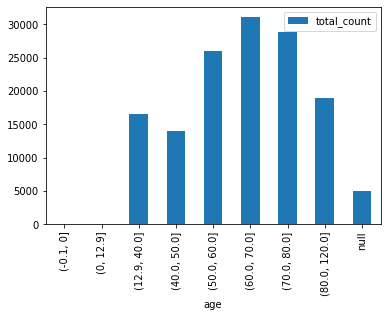

In [8]:
df_age, _, _  = _agedist(df_total, 'total')

In [10]:
df_age

,age,total_count,total_%
0,"(-0.1, 0]",30,0.021369
1,"(0, 12.9]",0,0.000000
2,"(12.9, 40.0]",16508,11.758589
3,"(40.0, 50.0]",14017,9.984258
4,"(50.0, 60.0]",25925,18.466283
5,"(60.0, 70.0]",31063,22.126062
6,"(70.0, 80.0]",28901,20.586077
7,"(80.0, 120.0]",18959,13.504427
0,null,4988,3.552934


In [11]:
_bmidist(df_total, 'total')

Min: 14.84 Max: 69.94
                           bmi  total_count    total_%
0     [0.0 - 18.5] underweight         5711   4.067925
1  [18.5 - 24.9] normal weight        38666  27.541652
2       [25 -  30] over weight        40873  29.113690
3                [70  <] obese        49636  35.355543
0                         null         5505   3.921192
Verification:   total_count: 140391 total_%: 100.0%


(                           bmi  total_count    total_%
 0     [0.0 - 18.5] underweight         5711   4.067925
 1  [18.5 - 24.9] normal weight        38666  27.541652
 2       [25 -  30] over weight        40873  29.113690
 3                [70  <] obese        49636  35.355543
 0                         null         5505   3.921192,
 5505,
 0.039211915293715406)

In [12]:
df_total = df_total[(df_total['age']!=0.0) & (df_total['age'].notnull())]
df_total.shape[0]

135373

Invalid age: 0 Min: 16.00 Max: 96.00
Verification:   total_count: 135373 total_%: 100.0%


(             age  total_count    total_%
 0      (-0.1, 0]            0   0.000000
 1      (0, 12.9]            0   0.000000
 2   (12.9, 40.0]        16508  12.194455
 3   (40.0, 50.0]        14017  10.354354
 4   (50.0, 60.0]        25925  19.150791
 5   (60.0, 70.0]        31063  22.946230
 6   (70.0, 80.0]        28901  21.349161
 7  (80.0, 120.0]        18959  14.005008
 0           null            0   0.000000,
 0,
 0.0)

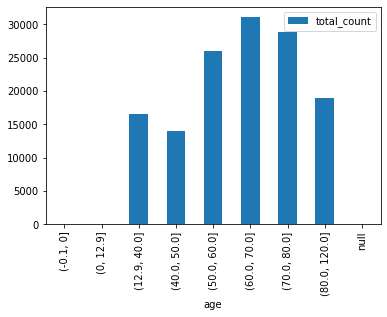

In [13]:
_agedist(df_total, 'total')

In [14]:
df_total.groupby(['age', 'gender', 'ethnicity']).agg(['count'])

encounter_id   bmi height weight
                                    count count  count  count
age  gender ethnicity                                        
16.0 F      African American            7     7      7      7
            Asian                       1     1      1      1
            Caucasian                  37    35     36     35
            Native American             1     1      1      1
            Other/Unknown               1     1      1      1
...                                   ...   ...    ...    ...
96.0 F      Caucasian                  15    15     15     15
     M      African American            1     1      1      1
            Caucasian                   8     7      7      8
            Hispanic                    1     1      1      1
            Other/Unknown               1     1      1      1

[927 rows x 4 columns]

In [15]:
df_total[df_total.isnull().any(axis=1)].count()

encounter_id    6786
age             6786
bmi             1493
ethnicity       5082
gender          6759
height          4522
weight          2575
dtype: int64

In [16]:
df_total = df_total.dropna()

In [17]:
df_total.shape[0]

128587

Invalid age: 0 Min: 16.00 Max: 96.00
Verification:   total_count: 128587 total_%: 100.0%


(             age  total_count    total_%
 0      (-0.1, 0]            0   0.000000
 1      (0, 12.9]            0   0.000000
 2   (12.9, 40.0]        15569  12.107756
 3   (40.0, 50.0]        13282  10.329193
 4   (50.0, 60.0]        24667  19.183121
 5   (60.0, 70.0]        29596  23.016324
 6   (70.0, 80.0]        27485  21.374634
 7  (80.0, 120.0]        17988  13.988972
 0           null            0   0.000000,
 0,
 0.0)

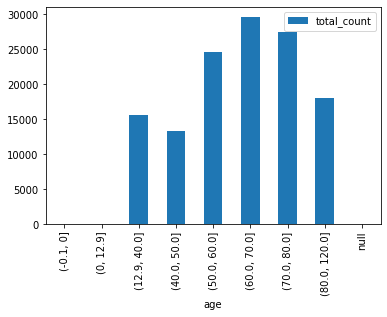

In [18]:
_agedist(df_total, 'total')

In [19]:
df_total.insert(7,'bmi_cat', BMI_BINS(df_total))

In [20]:
df_total.insert(8,'age_group',AGE_BINS(df_total))

In [21]:
df_total.columns

Index(['encounter_id', 'age', 'bmi', 'ethnicity', 'gender', 'height', 'weight',
       'bmi_cat', 'age_group'],
      dtype='object')

In [22]:
df_total

,encounter_id,age,bmi,ethnicity,gender,height,weight,bmi_cat,age_group
0,214826,68.0,22.732803,Caucasian,M,180.3,73.9,[18.5 - 24.9] normal weight,"(60.0, 70.0]"
1,246060,77.0,27.421875,Caucasian,F,160.0,70.2,[25 - 30] over weight,"(70.0, 80.0]"
2,276985,25.0,31.952749,Caucasian,F,172.7,95.3,[70 <] obese,"(12.9, 40.0]"
3,262220,81.0,22.635548,Caucasian,F,165.1,61.7,[18.5 - 24.9] normal weight,"(80.0, 120.0]"
5,182697,67.0,27.555611,Caucasian,M,190.5,100.0,[25 - 30] over weight,"(60.0, 70.0]"
...,...,...,...,...,...,...,...,...,...
10229,143750,36.0,37.500000,Caucasian,F,170.1,108.6,[70 <] obese,"(12.9, 40.0]"
10230,143813,61.0,32.100000,Caucasian,F,160.0,82.3,[70 <] obese,"(60.0, 70.0]"
10231,137126,74.0,22.700000,Caucasian,F,165.1,62.0,[18.5 - 24.9] normal weight,"(70.0, 80.0]"
10232,135652,90.0,19.900000,Caucasian,F,160.0,50.9,[18.5 - 24.9] normal weight,"(80.0, 120.0]"


In [24]:
df_total['age_group'].value_counts()

(60.0, 70.0]     29596
(70.0, 80.0]     27485
(50.0, 60.0]     24667
(80.0, 120.0]    17988
(12.9, 40.0]     15569
(40.0, 50.0]     13282
(-0.1, 0]            0
(0, 12.9]            0
Name: age_group, dtype: int64

In [25]:
df_total

,encounter_id,age,bmi,ethnicity,gender,height,weight,bmi_cat,age_group
0,214826,68.0,22.732803,Caucasian,M,180.3,73.9,[18.5 - 24.9] normal weight,"(60.0, 70.0]"
1,246060,77.0,27.421875,Caucasian,F,160.0,70.2,[25 - 30] over weight,"(70.0, 80.0]"
2,276985,25.0,31.952749,Caucasian,F,172.7,95.3,[70 <] obese,"(12.9, 40.0]"
3,262220,81.0,22.635548,Caucasian,F,165.1,61.7,[18.5 - 24.9] normal weight,"(80.0, 120.0]"
5,182697,67.0,27.555611,Caucasian,M,190.5,100.0,[25 - 30] over weight,"(60.0, 70.0]"
...,...,...,...,...,...,...,...,...,...
10229,143750,36.0,37.500000,Caucasian,F,170.1,108.6,[70 <] obese,"(12.9, 40.0]"
10230,143813,61.0,32.100000,Caucasian,F,160.0,82.3,[70 <] obese,"(60.0, 70.0]"
10231,137126,74.0,22.700000,Caucasian,F,165.1,62.0,[18.5 - 24.9] normal weight,"(70.0, 80.0]"
10232,135652,90.0,19.900000,Caucasian,F,160.0,50.9,[18.5 - 24.9] normal weight,"(80.0, 120.0]"


In [26]:
df_new = df_total[['gender', 'ethnicity', 'height', 'weight', 'bmi_cat']]
df_new

,gender,ethnicity,height,weight,bmi_cat
0,M,Caucasian,180.3,73.9,[18.5 - 24.9] normal weight
1,F,Caucasian,160.0,70.2,[25 - 30] over weight
2,F,Caucasian,172.7,95.3,[70 <] obese
3,F,Caucasian,165.1,61.7,[18.5 - 24.9] normal weight
5,M,Caucasian,190.5,100.0,[25 - 30] over weight
...,...,...,...,...,...
10229,F,Caucasian,170.1,108.6,[70 <] obese
10230,F,Caucasian,160.0,82.3,[70 <] obese
10231,F,Caucasian,165.1,62.0,[18.5 - 24.9] normal weight
10232,F,Caucasian,160.0,50.9,[18.5 - 24.9] normal weight


In [27]:
import pandas as pd
df_new = pd.get_dummies(df_new, prefix = ['gender', 'ethnicity','bmi_cat'])

In [28]:
df_new

,height,weight,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,bmi_cat_[0.0 - 18.5] underweight,bmi_cat_[18.5 - 24.9] normal weight,bmi_cat_[25 - 30] over weight,bmi_cat_[70 <] obese
0,180.3,73.9,0,1,0,0,1,0,0,0,0,1,0,0
1,160.0,70.2,1,0,0,0,1,0,0,0,0,0,1,0
2,172.7,95.3,1,0,0,0,1,0,0,0,0,0,0,1
3,165.1,61.7,1,0,0,0,1,0,0,0,0,1,0,0
5,190.5,100.0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,170.1,108.6,1,0,0,0,1,0,0,0,0,0,0,1
10230,160.0,82.3,1,0,0,0,1,0,0,0,0,0,0,1
10231,165.1,62.0,1,0,0,0,1,0,0,0,0,1,0,0
10232,160.0,50.9,1,0,0,0,1,0,0,0,0,1,0,0


In [29]:
df_index = pd.concat([df_new, df_total['age_group']], join = 'outer', axis = 1) 

In [30]:
def mapintfromgroup(age_group):
    print(age_group)
    
    if age_group == '(12.9, 40.0]':
        return 1
    elif age_group == '(40.0, 50.0]':
        return 2
    elif age_group == '(50.0, 60.0]':
        return 3
    elif age_group == '(60.0, 70.0]':
        return 4
    elif age_group == '(70.0, 80.0]':
        return 5
    elif age_group == '(80.0, 120.0]':
        return 6
    else:
        return 7
    '''
    if age_group == '(-0.1, 0]':
         return 1
    elif age_group == '(0, 12.9]':
        return 2
    elif age_group == '(12.9, 17.9]':
        return 3
    elif age_group == '(17.9, 30.0]':
        return 4
    elif age_group == '(30.0, 50.0]':
        return 5
    elif age_group == '(50.0, 70.0]':
        return 6
    elif age_group == '(70.0, 90.0]':
        return 7
    elif age_group == '(90.0, 120.0]':
        return 8
    else:
        return 9
    '''

In [31]:
df_index['age'] = df_index['age_group'].apply(lambda age_group: mapintfromgroup(age_group))

(-0.1, 0]
(0, 12.9]
(12.9, 40.0]
(40.0, 50.0]
(50.0, 60.0]
(60.0, 70.0]
(70.0, 80.0]
(80.0, 120.0]


In [32]:
df_index

,height,weight,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,bmi_cat_[0.0 - 18.5] underweight,bmi_cat_[18.5 - 24.9] normal weight,bmi_cat_[25 - 30] over weight,bmi_cat_[70 <] obese,age_group,age
0,180.3,73.9,0,1,0,0,1,0,0,0,0,1,0,0,"(60.0, 70.0]",4
1,160.0,70.2,1,0,0,0,1,0,0,0,0,0,1,0,"(70.0, 80.0]",5
2,172.7,95.3,1,0,0,0,1,0,0,0,0,0,0,1,"(12.9, 40.0]",1
3,165.1,61.7,1,0,0,0,1,0,0,0,0,1,0,0,"(80.0, 120.0]",6
5,190.5,100.0,0,1,0,0,1,0,0,0,0,0,1,0,"(60.0, 70.0]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,170.1,108.6,1,0,0,0,1,0,0,0,0,0,0,1,"(12.9, 40.0]",1
10230,160.0,82.3,1,0,0,0,1,0,0,0,0,0,0,1,"(60.0, 70.0]",4
10231,165.1,62.0,1,0,0,0,1,0,0,0,0,1,0,0,"(70.0, 80.0]",5
10232,160.0,50.9,1,0,0,0,1,0,0,0,0,1,0,0,"(80.0, 120.0]",6


In [33]:
df_new = df_index.drop(columns=['age_group'])

In [34]:
df_new

,height,weight,gender_F,gender_M,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,bmi_cat_[0.0 - 18.5] underweight,bmi_cat_[18.5 - 24.9] normal weight,bmi_cat_[25 - 30] over weight,bmi_cat_[70 <] obese,age
0,180.3,73.9,0,1,0,0,1,0,0,0,0,1,0,0,4
1,160.0,70.2,1,0,0,0,1,0,0,0,0,0,1,0,5
2,172.7,95.3,1,0,0,0,1,0,0,0,0,0,0,1,1
3,165.1,61.7,1,0,0,0,1,0,0,0,0,1,0,0,6
5,190.5,100.0,0,1,0,0,1,0,0,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,170.1,108.6,1,0,0,0,1,0,0,0,0,0,0,1,1
10230,160.0,82.3,1,0,0,0,1,0,0,0,0,0,0,1,4
10231,165.1,62.0,1,0,0,0,1,0,0,0,0,1,0,0,5
10232,160.0,50.9,1,0,0,0,1,0,0,0,0,1,0,0,6


In [35]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
# split into input and output elements
data = df_new.values


In [36]:
data

array([[180.3,  73.9,   0. , ...,   0. ,   0. ,   4. ],
       [160. ,  70.2,   1. , ...,   1. ,   0. ,   5. ],
       [172.7,  95.3,   1. , ...,   0. ,   1. ,   1. ],
       ...,
       [165.1,  62. ,   1. , ...,   0. ,   0. ,   5. ],
       [160. ,  50.9,   1. , ...,   0. ,   0. ,   6. ],
       [177.8,  81. ,   0. , ...,   1. ,   0. ,   1. ]])

In [37]:
X, y = data[:, :-1], data[:, -1]

In [38]:
type(X); type(y)

numpy.ndarray

In [39]:
X

array([[180.3,  73.9,   0. , ...,   1. ,   0. ,   0. ],
       [160. ,  70.2,   1. , ...,   0. ,   1. ,   0. ],
       [172.7,  95.3,   1. , ...,   0. ,   0. ,   1. ],
       ...,
       [165.1,  62. ,   1. , ...,   1. ,   0. ,   0. ],
       [160. ,  50.9,   1. , ...,   1. ,   0. ,   0. ],
       [177.8,  81. ,   0. , ...,   0. ,   1. ,   0. ]])

In [40]:
y

array([4., 5., 1., ..., 5., 6., 1.])

Class=3, n=29596 (23.016%)
Class=4, n=27485 (21.375%)
Class=0, n=15569 (12.108%)
Class=5, n=17988 (13.989%)
Class=2, n=24667 (19.183%)
Class=1, n=13282 (10.329%)


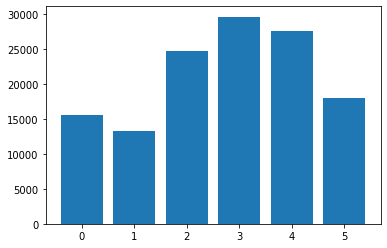

In [41]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=3, n=29596 (16.667%)
Class=4, n=29596 (16.667%)
Class=0, n=29596 (16.667%)
Class=5, n=29596 (16.667%)
Class=2, n=29596 (16.667%)
Class=1, n=29596 (16.667%)


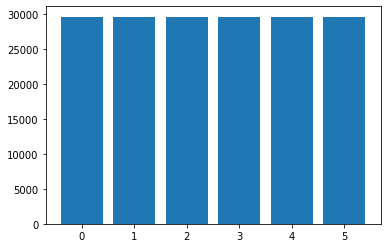

In [45]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#df_new.columns

In [ ]:
'''
df = pd.DataFrame(data={'height': X[:, 0], 'weight': X[:, 1], 'gender_F': X[:, 2], 'gender_M': X[:, 3],
                        'ethnicity_African American': X[:, 4], 'ethnicity_Asian': X[:, 5],
                        'ethnicity_Caucasian': X[:,6], 'ethnicity_Hispanic': X[:,7],
                       'ethnicity_Native American': X[:,8], 'ethnicity_Other/Unknown':X[:,9],
                       'bmi_cat_[0.0 - 18.5] underweight': X[:,10],
                        'bmi_cat_[18.5 - 24.9] normal weight': X[:,11],
                        'bmi_cat_[25 -  30] over weight': X[:,12],
                        'bmi_cat_[70  <] obese':X[:,13],
                        'age':y
                        }) 
df
'''

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [47]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
# accuracy on X_test 
accuracy = dtree_model.score(X_test, y_test) 
print(accuracy) 

0.23405189890525746


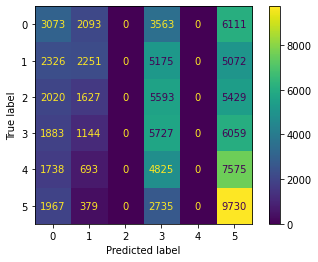

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree_model, X_test, y_test)  

In [ ]:
y_test

In [ ]:
dtree_predictions

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, gnb_predictions) 

In [ ]:
plot_confusion_matrix(dtree_model, X_test, y_test)  

In [ ]:
y_test

In [ ]:
gnb_predictions

In [ ]:
df_test = pd.DataFrame(data={'height': y_test[:, 0], 'weight': y_test[:, 1], 'gender_F': y_test[:, 2], 'gender_M': X[:, 3],
                        'ethnicity_African American': X[:, 4], 'ethnicity_Asian': X[:, 5],
                        'ethnicity_Caucasian': X[:,6], 'ethnicity_Hispanic': X[:,7],
                       'ethnicity_Native American': X[:,8], 'ethnicity_Other/Unknown':X[:,9],
                       'bmi_cat_[0.0 - 18.5] underweight': X[:,10],
                        'bmi_cat_[18.5 - 24.9] normal weight': X[:,11],
                        'bmi_cat_[25 -  30] over weight': X[:,12],
                        'bmi_cat_[70  <] obese':X[:,13],
                        'age':y
                        }) 

In [ ]:
cm